**libraries**

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import keras

**Load Dataset**

In [2]:
data_dir = 'D:/ACADEMIC/SEMESTER TWO/DESERTATION/Ship_Detection_Model/Ship_Classification/DATASET/train'
batch_size = 32
img_size = (224, 224)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 2016 images belonging to 2 classes.


In [5]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 504 images belonging to 2 classes.


**Data Visualization**

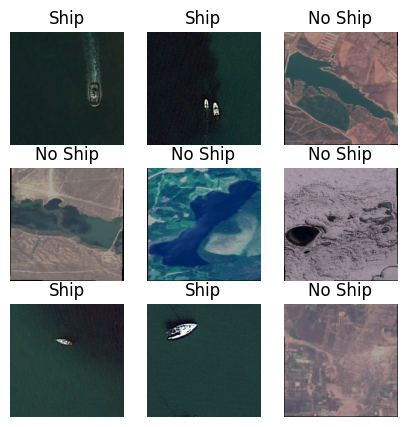

In [6]:
def plot_images(generator):
    class_names = list(generator.class_indices.keys())
    images, labels = next(generator)
    plt.figure(figsize=(5, 5))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis('off')
    plt.show()

plot_images(train_generator)

**Train the SSD Model**

In [7]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

d:\04_Personal_Files\Python\Ship_Detection_Model\Venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 717ms/step - accuracy: 0.9558 - loss: 0.1661 - val_accuracy: 0.9901 - val_loss: 0.0240
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 678ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9960 - val_loss: 0.0214
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 705ms/step - accuracy: 1.0000 - loss: 1.6829e-04 - val_accuracy: 0.9960 - val_loss: 0.0226
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 728ms/step - accuracy: 1.0000 - loss: 1.0688e-04 - val_accuracy: 0.9960 - val_loss: 0.0221
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 682ms/step - accuracy: 1.0000 - loss: 4.5438e-05 - val_accuracy: 0.9960 - val_loss: 0.0222
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 718ms/step - accuracy: 1.0000 - loss: 6.5717e-05 - val_accuracy: 0.9960 - val_loss: 0.0220
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 764ms/step - accuracy: 1.0000 - loss: 3.6194e-05 - val_accuracy: 0.9960 - val_loss: 0.0223
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 662ms/step - accuracy: 1.0000 - los

**Model Validation**

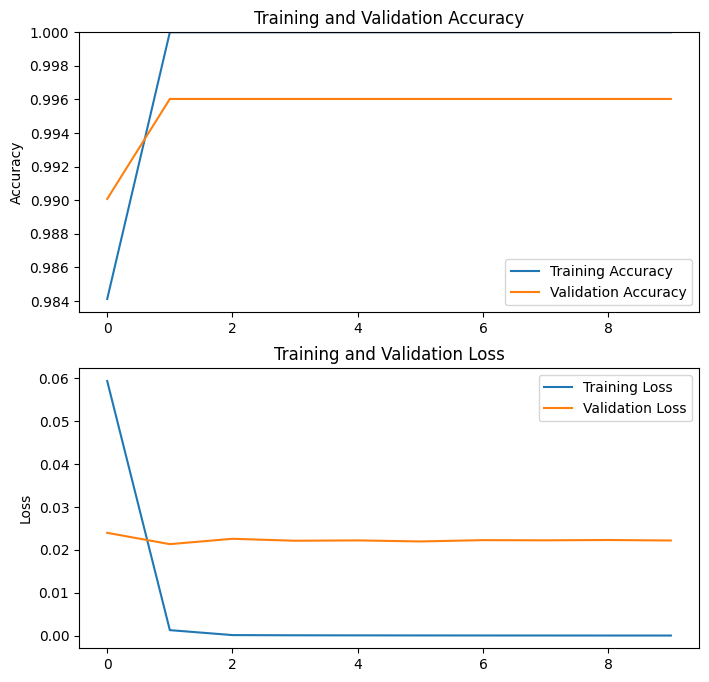

In [11]:
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()), 1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training(history)

**Validation Reports and Plots**

In [12]:
validation_generator.reset()
Y_pred = model.predict(validation_generator, len(validation_generator))
y_pred = np.round(Y_pred).astype(int)

16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 982ms/step


Confusion Matrix


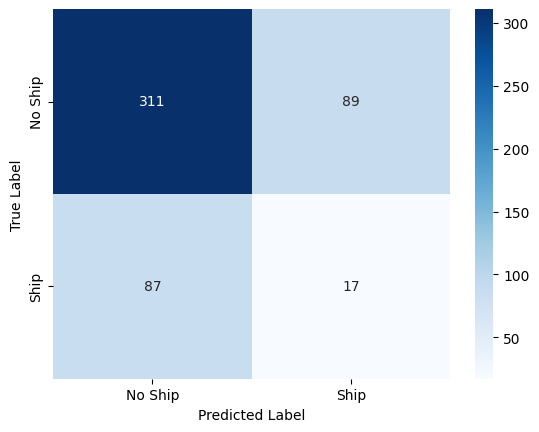

In [13]:
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Ship', 'Ship'], yticklabels=['No Ship', 'Ship'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [14]:
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=['No Ship', 'Ship']))

Classification Report
              precision    recall  f1-score   support

     No Ship       0.78      0.78      0.78       400
        Ship       0.16      0.16      0.16       104

    accuracy                           0.65       504
   macro avg       0.47      0.47      0.47       504
weighted avg       0.65      0.65      0.65       504



**Save Model**

In [16]:
model.save('D:/ACADEMIC/SEMESTER TWO/DESERTATION/Ship_Detection_Model/Ship_Classification/SSD/Models/ssd_model.keras')